In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython import display
from IPython.core.display import HTML

In [3]:
display.display(HTML("<style>.container { width:70% !important; }</style>"))

Описание задания
- Постройте пять графиков по выбранным данным. 
- Графики должны быть различных видов и использовать хотя бы две из рассмотренных на занятии библиотек. 
- Опишите для каждого графика:
    * какого типа переменные участвуют в визуализации;
    * какова её цель (например: посмотреть на корреляцию двух величин или на распределение значений);
    * почему выбрали именно такой тип графика.


Для задания использован датасет с треками из Spotify

In [6]:
df = pd.read_csv('spotify_songs.csv')

Посмотрим информацию о датасете
- track_id: Уникальный идентификатор трека.
- track_name: Название трека.
- track_artist: Исполнитель трека.
- track_popularity: Популярность трека.
- track_album_id: Идентификатор альбома трека.
- track_album_name: Название альбома.
- track_album_release_date: Дата выпуска альбома.
- playlist_name: Название плейлиста.
- playlist_id: Идентификатор плейлиста.
- playlist_genre: Жанр плейлиста.
- playlist_subgenre: Поджанр плейлиста.
- danceability: Мера танцевальности трека.
- energy: Мера энергии трека.
- key: Тональность трека.
- loudness: Громкость трека.
- mode: Мажор или минор.
- speechiness: Мера наличия разговорного текста в треке.
- acousticness: Мера акустичности трека.
- instrumentalness: Мера инструментальности трека.
- liveness: Мера живого звучания.
- valence: Мера позитивности.
- tempo: Темп трека.
- duration_ms: Продолжительность трека в миллисекундах.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

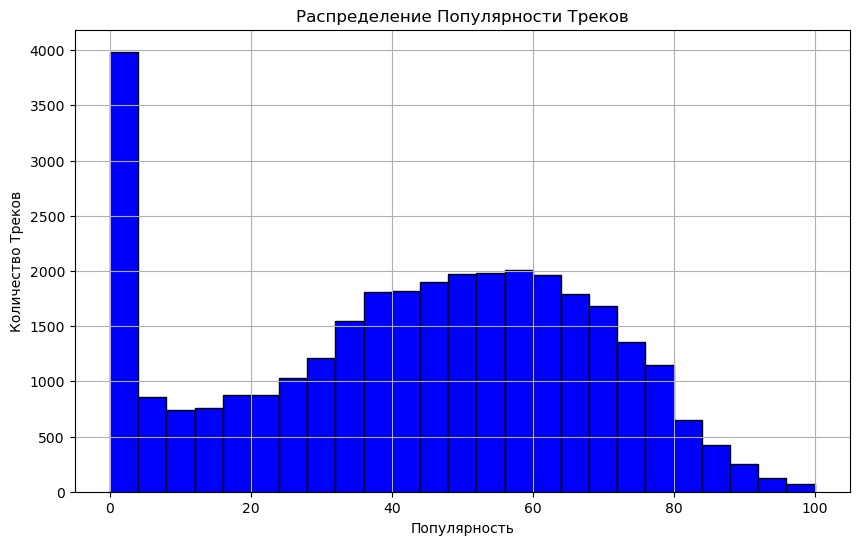

In [18]:
popularity = df['track_popularity']
plt.figure(figsize=(10, 6))
plt.hist(popularity, bins=25, color='blue', edgecolor='black')
plt.title('Распределение Популярности Треков')
plt.xlabel('Популярность')
plt.ylabel('Количество Треков')
plt.grid(True)
plt.show()

- Можно отметить большое количество треков с нулевой и близкой к нулю популярностью. Это может указывать на наличие большого числа менее известных или новых треков, которые ещё не набрали популярность.
- Можно отметить нормальное распределение в остальной части. Это означает, что большинство треков в датасете имеют среднюю популярность, с уменьшающимся количеством треков по мере приближения к крайним значениям популярности.
- Данные дискретные, оценка целочисленная, поэтому нужно использовать количество корзин на которое оценки делятся без остатка, чтобы график был корректен и не было шипов

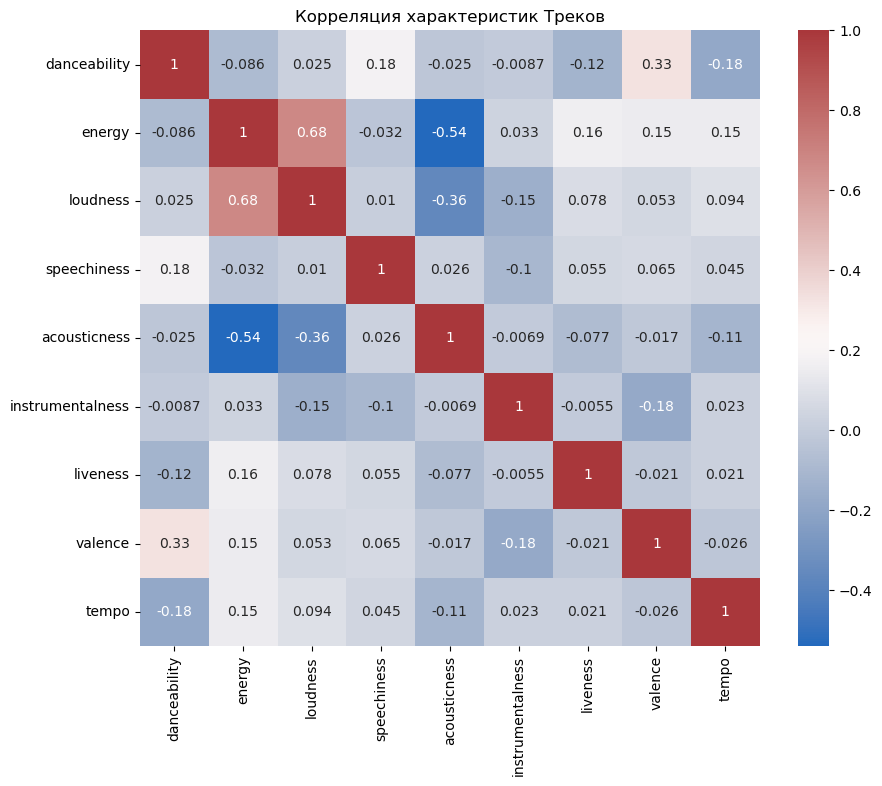

In [21]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
corr_mtx = df[audio_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mtx, annot=True, cmap='vlag')
plt.title('Корреляция характеристик Треков')
plt.show()

- На хитмапе удобно посмотреть корреляции признаков. Можно в первую очередь отметить зависимость мер энергичности и громкости, а также энергичности и акустичности

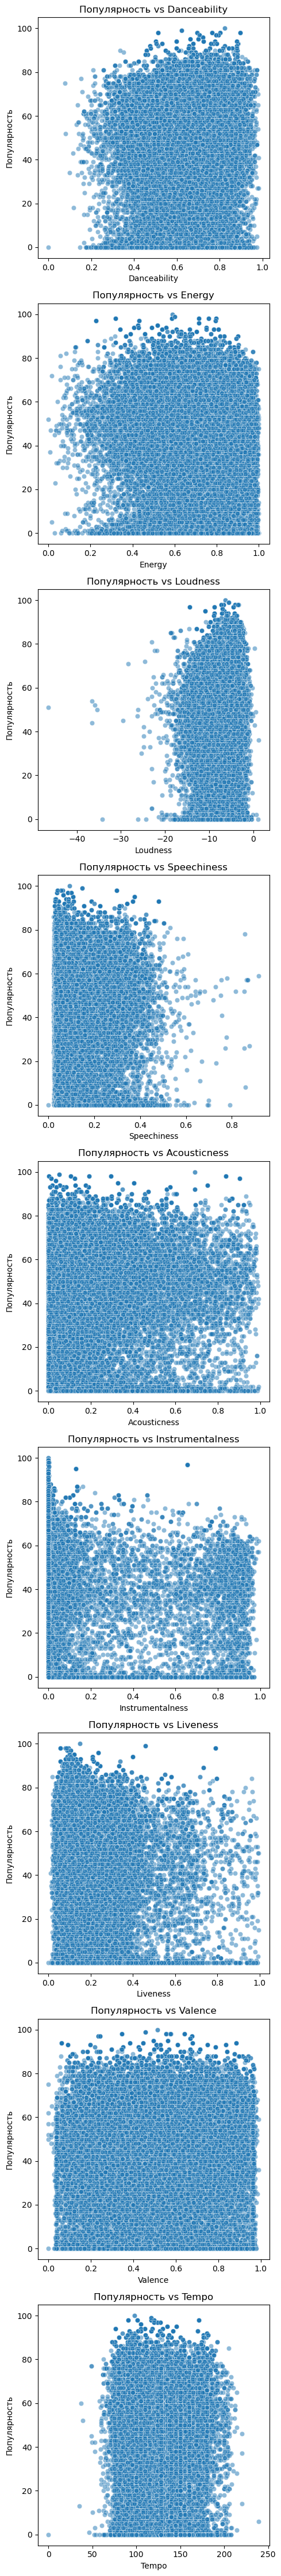

In [28]:
pair_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence']

fig, axes = plt.subplots(len(audio_features), 1, figsize=(5, 5 * len(audio_features)))

for i, feature in enumerate(audio_features):
    sns.scatterplot(data=df, x=feature, y='track_popularity', ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Популярность vs {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Популярность')

plt.tight_layout()
plt.show()

In [ ]:
pop_val = spotify_data[['track_popularity', 'duration_ms']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=popularity_duration_data, x='duration_ms', y='track_popularity', alpha=0.5)
plt.title('Связь между Популярностью Трека и Его Длительностью')
plt.xlabel('Длительность (мс)')
plt.ylabel('Популярность')
plt.show()